## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection

In [2]:
train_df = pd.read_csv("data/train.csv")
features_df = pd.read_csv("data/features.csv")
test_df = pd.read_csv("data/test.csv")
stores_df = pd.read_csv("data/stores.csv")

In [3]:
def  Missing_Inspection(x):
    return pd.Series([x.count(),x.isnull().sum()],index = ['Total',"Missing"])

#UDF to Create Numerical Data Audit Report
def  num_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index = ['Total',"Missing","SUM",'MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])

# UDF to create categorical data audit report
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()], index=['N','NMISS','ColumnsName'])

In [4]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
train_data = pd.merge(train_df, stores_df)
train_df = pd.merge(train_data, features_df, on=["Store", "Date", "IsHoliday"])
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [7]:
test_data = pd.merge(test_df, stores_df)
test_df = pd.merge(test_data, features_df, on=["Store", "Date", "IsHoliday"])
test_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [8]:
train_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [9]:
# Splitting categorical and numerical features in training set
train_num = train_df.select_dtypes(include=["float64", "float32", "int32", "int64"])
train_cat = train_df.select_dtypes(include=["object", "O"])
print("Training data: ")
print(f"Numerical attributes: {train_num.columns.tolist()}")
print(f"Categorical attributes: {train_cat.columns.tolist()}")

Training data: 
Numerical attributes: ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Categorical attributes: ['Date', 'Type']


In [10]:
writer = pd.ExcelWriter("Walmart_Sales.xlsx")
train_num_summary = train_num.apply(num_var_summary).T
train_num_summary.to_excel(writer, "train_num_summary", index=True)
train_num_summary

,Total,Missing,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [11]:
train_cat_summary = train_cat.apply(cat_summary).T
train_cat_summary.to_excel(writer, "train_cat_summary", index=True)
train_cat_summary

,N,NMISS,ColumnsName
Date,421570,0,Date 2011-12-23 3027 2011-11-25 3021 201...
Type,421570,0,Type A 215478 B 163495 C 42597 Name:...


In [12]:
# Splitting categorical and numerical features in testing set
test_num = test_df.select_dtypes(include=["float64", "float32", "int32", "int64"])
test_cat = test_df.select_dtypes(include=["object", "O"])
print("Testing data: ")
print(f"Numerical attributes: {test_num.columns.tolist()}")
print(f"Categorical attributes: {test_cat.columns.tolist()}")

Testing data: 
Numerical attributes: ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Categorical attributes: ['Date', 'Type']


In [13]:
test_num_summary = test_num.apply(num_var_summary).T
test_num_summary.to_excel(writer, "test_num_summary", index=True)
test_num_summary

,Total,Missing,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000000,12.809930,1.640943e+02,1.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000000,30.656410,9.398155e+02,1.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000000,61106.926438,3.734056e+09,34875.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470000,18.724153,3.505939e+02,-7.290000,11.440000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000,92.140000,101.950000
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606000,0.239442,5.733244e-02,2.872000,2.957000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000,4.079000,4.125000
MarkDown1,114915.0,149.0,8.836063e+08,7689.216439,4842.290000,10698.760716,1.144635e+08,-2781.450000,20.840000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000,65757.570000,103184.980000
MarkDown2,86437.0,28627.0,3.227602e+08,3734.051729,742.590000,8323.495014,6.928057e+07,-35.740000,0.020000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000,42920.210000,71074.170000
MarkDown3,105235.0,9829.0,2.528890e+08,2403.088666,78.260000,13767.939313,1.895562e+08,-179.260000,0.150000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000,86476.660000,149483.310000
MarkDown4,102176.0,12888.0,3.429250e+08,3356.219071,840.940000,7570.501545,5.731249e+07,0.220000,2.610000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000,44739.280000,65344.640000
MarkDown5,115064.0,0.0,4.513594e+08,3922.681189,2390.430000,19445.150745,3.781139e+08,-185.170000,269.300000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000,18599.300000,771448.100000


In [14]:
test_cat_summary = test_cat.apply(cat_summary).T
test_cat_summary.to_excel(writer, "test_cat_summary", index=True)
test_cat_summary

,N,NMISS,ColumnsName
Date,115064,0,Date 2012-12-21 3002 2012-12-07 2989 201...
Type,115064,0,Type A 58713 B 44500 C 11851 Name: co...


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


### Correlation

In [16]:
train_df_temp = train_df.drop(["Date", "Type"], axis=1)
train_corr = pd.DataFrame(train_df_temp.corr())
train_corr.to_excel(writer,'train_data_corr',index = True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


<Axes: >

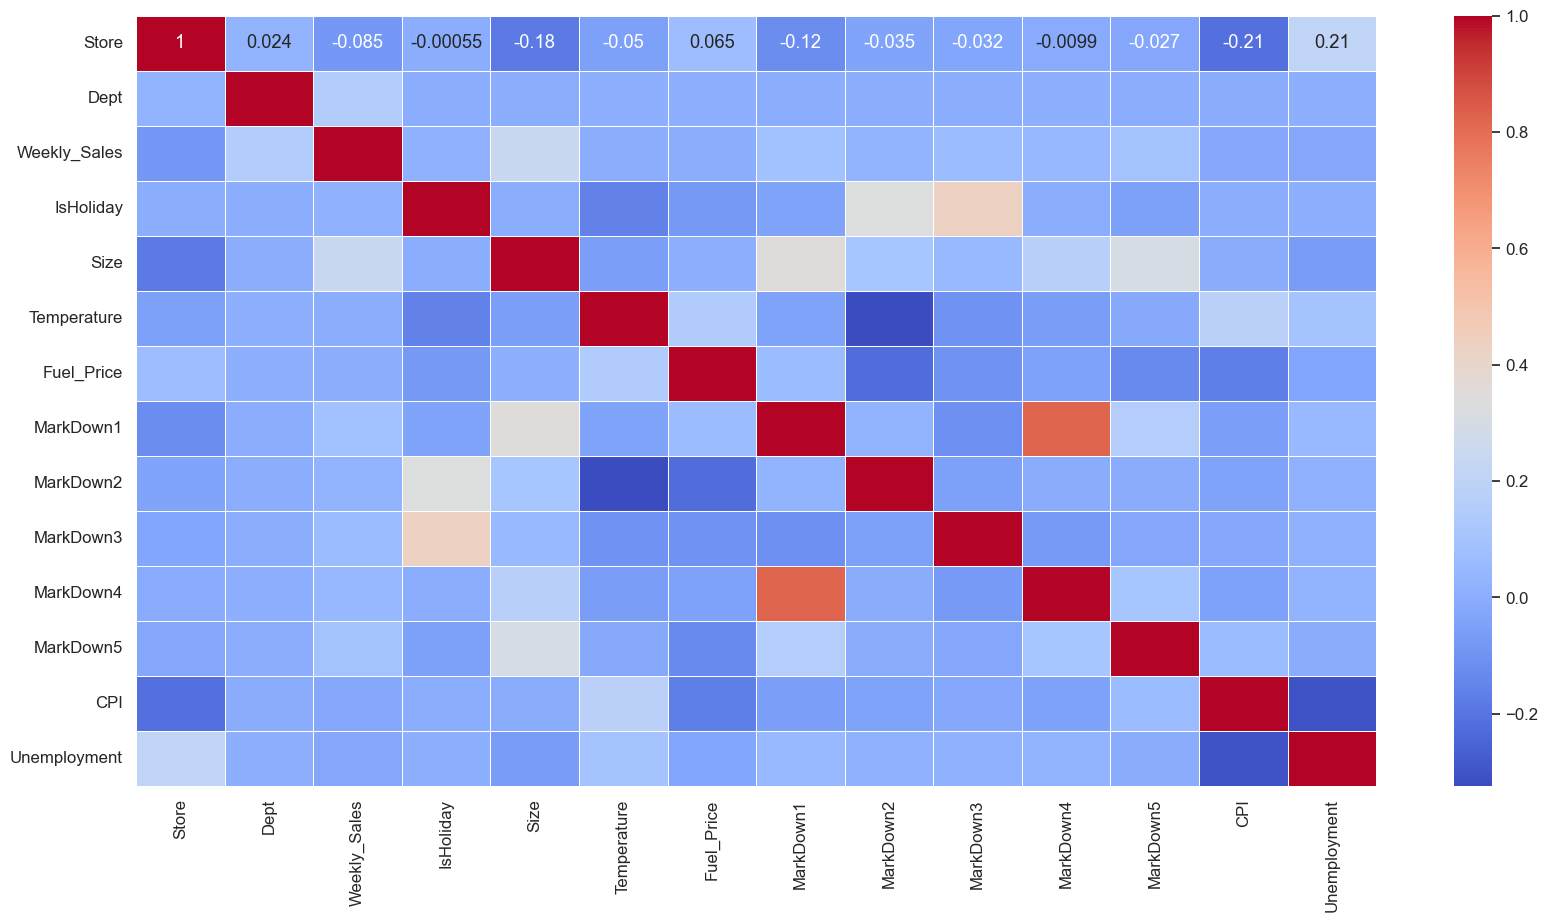

In [17]:
sns.set(rc={"figure.figsize": (20, 10)}, font_scale=1.1)
sns.heatmap(train_df_temp.corr(),linewidths=0.5,annot=True, cmap="coolwarm")

In [18]:
test_df_temp = test_df.drop(["Date", "Type"], axis=1)
test_corr = pd.DataFrame(test_df_temp.corr())
test_corr.to_excel(writer,'test_data_corr',index = True)
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


<Axes: >

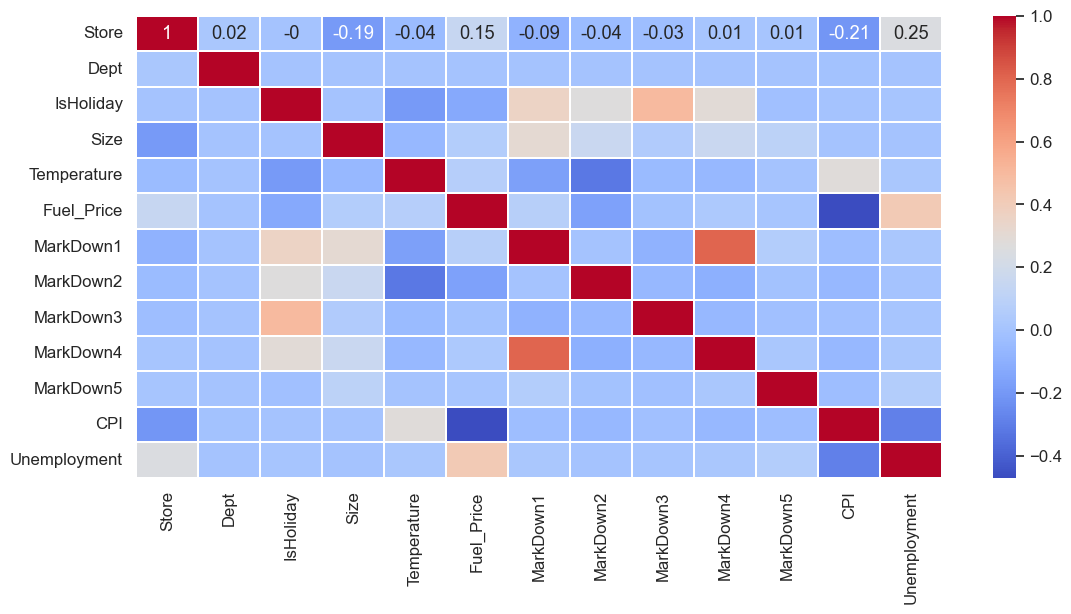

In [19]:
sns.set(rc={"figure.figsize": (13, 6)}, font_scale=1.1)
sns.heatmap((test_df_temp.corr()).round(2), linewidths=0.25, annot=True, cmap="coolwarm")

<Axes: xlabel='Store'>

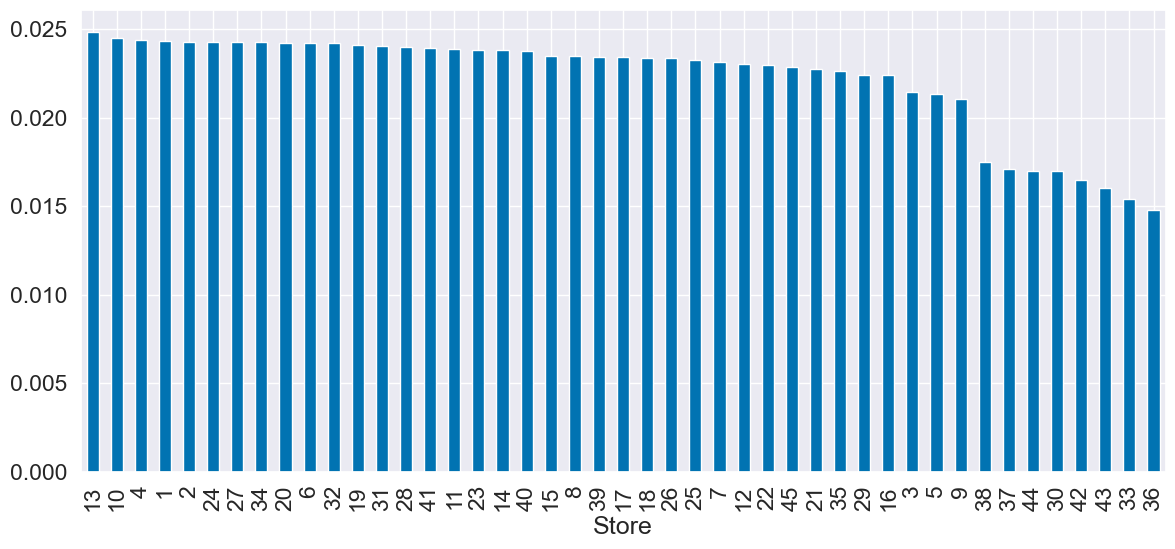

In [20]:
sns.set(rc={'figure.figsize':(14,6)}, palette="colorblind", font_scale=1.5)
train_df['Store'].value_counts(normalize=True).plot(kind = 'bar')

C:\Users\saket\AppData\Local\Temp\ipykernel_19112\3249113548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Weekly_Sales)
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

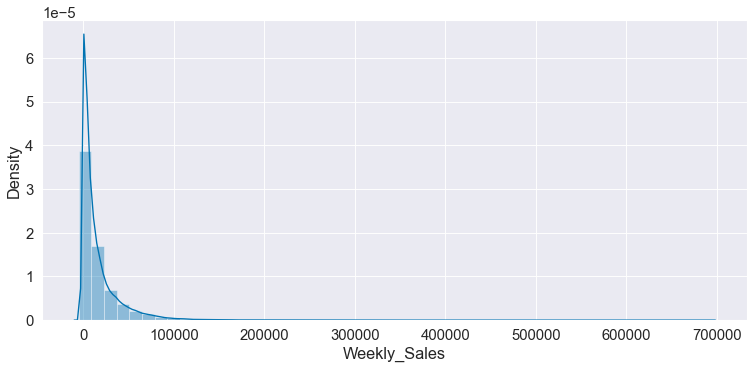

In [21]:
plt.figure(dpi=65)
sns.distplot(train_df.Weekly_Sales)

<Axes: >

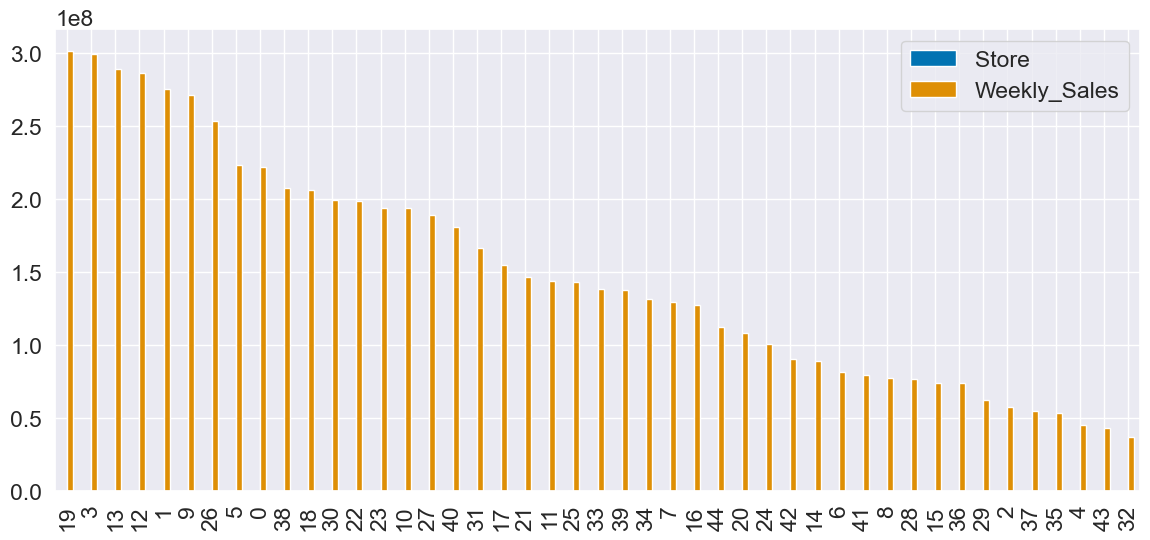

In [22]:
train_df.groupby('Store').agg({'Weekly_Sales':"sum"}).reset_index().sort_values('Weekly_Sales', ascending=False).plot(kind='bar')

c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


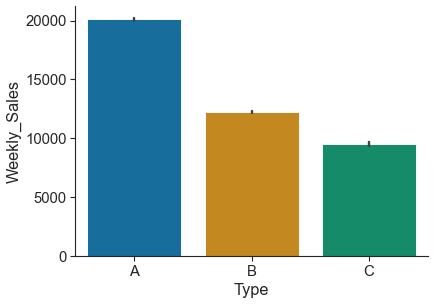

In [23]:
plt.figure(figsize=(7,5),dpi=65)
sns.set_style('ticks')
sns.barplot(x=train_df["Type"], y=train_df["Weekly_Sales"], palette='colorblind')
sns.despine()

c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


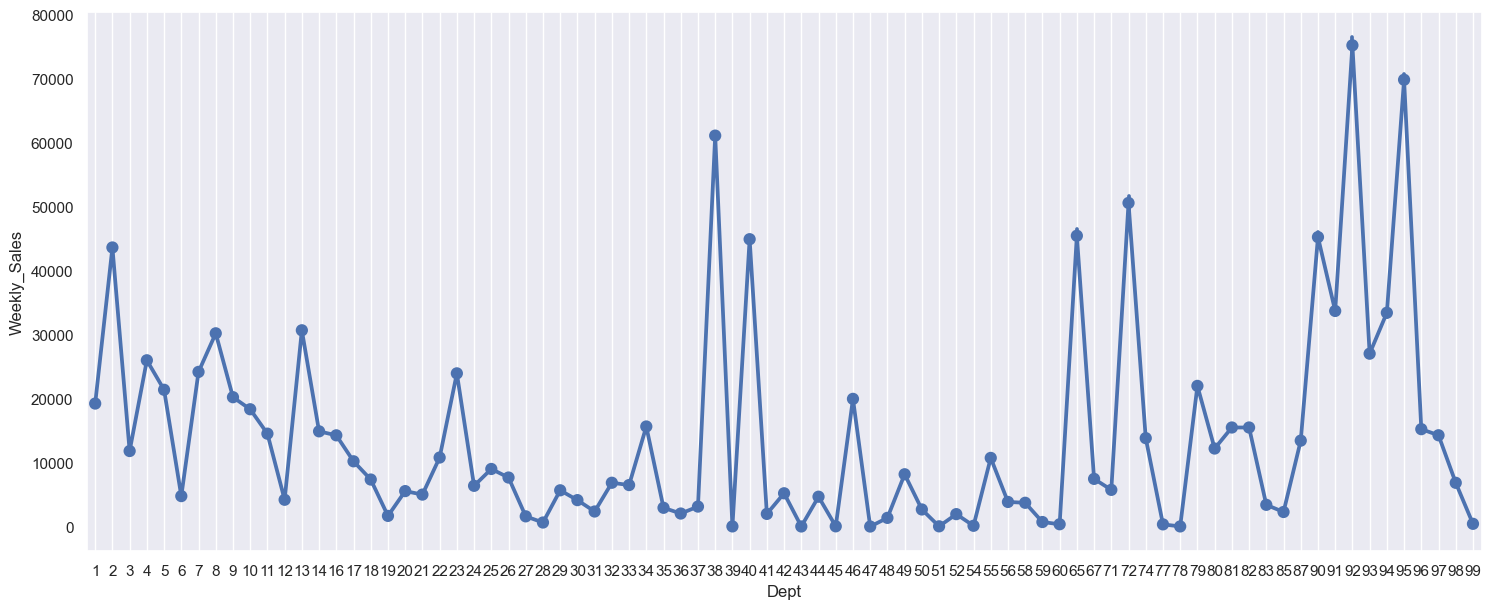

In [24]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,7)})
sns.pointplot(x='Dept', y='Weekly_Sales',data=train_df)
plt.grid()

In [25]:
train_df.apply(Missing_Inspection).T

,Total,Missing
Store,421570,0
Dept,421570,0
Date,421570,0
Weekly_Sales,421570,0
IsHoliday,421570,0
Type,421570,0
Size,421570,0
Temperature,421570,0
Fuel_Price,421570,0
MarkDown1,150681,270889


In [26]:
test_df.apply(Missing_Inspection).T

,Total,Missing
Store,115064,0
Dept,115064,0
Date,115064,0
IsHoliday,115064,0
Type,115064,0
Size,115064,0
Temperature,115064,0
Fuel_Price,115064,0
MarkDown1,114915,149
MarkDown2,86437,28627


In [27]:
negative_value_train_attrs = train_num_summary[train_num_summary["MIN"] < 0].index.tolist()
negative_value_test_attrs = test_num_summary[test_num_summary["MIN"] < 0].index.tolist()
print("Negative valued attributes in training data")
print(negative_value_train_attrs)
print()
print("Negative valued attributes in testing data")
print(negative_value_test_attrs)

Negative valued attributes in training data
['Weekly_Sales', 'Temperature', 'MarkDown2', 'MarkDown3']

Negative valued attributes in testing data
['Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5']


In [28]:
train_df.loc[train_df["Weekly_Sales"] < 0, "Weekly_Sales"] = 0
train_df.loc[train_df["MarkDown2"] < 0, "MarkDown2"] = 0
train_df.loc[train_df["MarkDown3"] < 0, "MarkDown3"] = 0
test_df.loc[test_df["MarkDown1"] < 0, "MarkDown1"] = 0
test_df.loc[test_df["MarkDown2"] < 0, "MarkDown2"] = 0
test_df.loc[test_df["MarkDown3"] < 0, "MarkDown3"] = 0
test_df.loc[test_df["MarkDown5"] < 0, "MarkDown5"] = 0

In [29]:
test_df["CPI"] = test_df.groupby(["Dept"])["CPI"].transform(lambda x: x.fillna(x.mean()))
test_df["Unemployment"] = test_df.groupby(["Dept"])["Unemployment"].transform(lambda x: x.fillna(x.mean()))

In [30]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

C:\Users\saket\AppData\Local\Temp\ipykernel_19112\3006566823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Weekly_Sales)
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

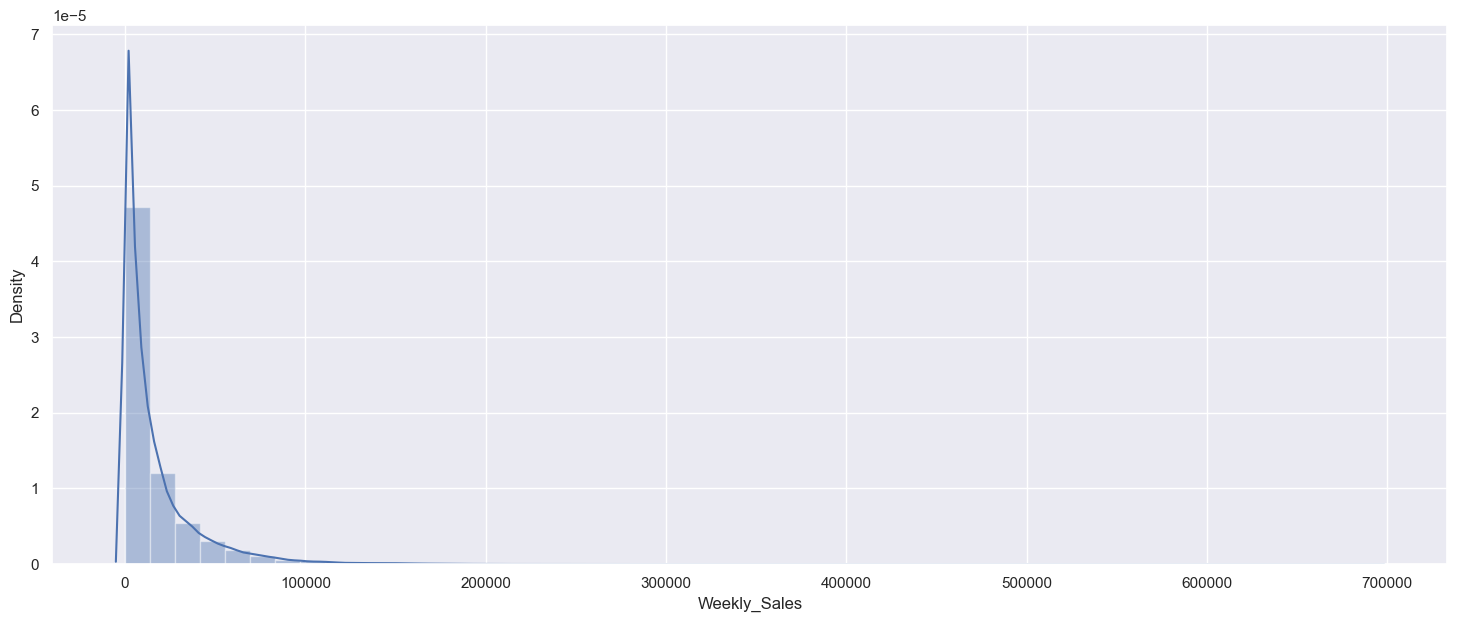

In [31]:
sns.distplot(train_df.Weekly_Sales)

C:\Users\saket\AppData\Local\Temp\ipykernel_19112\1512306623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Weekly_Sales)
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

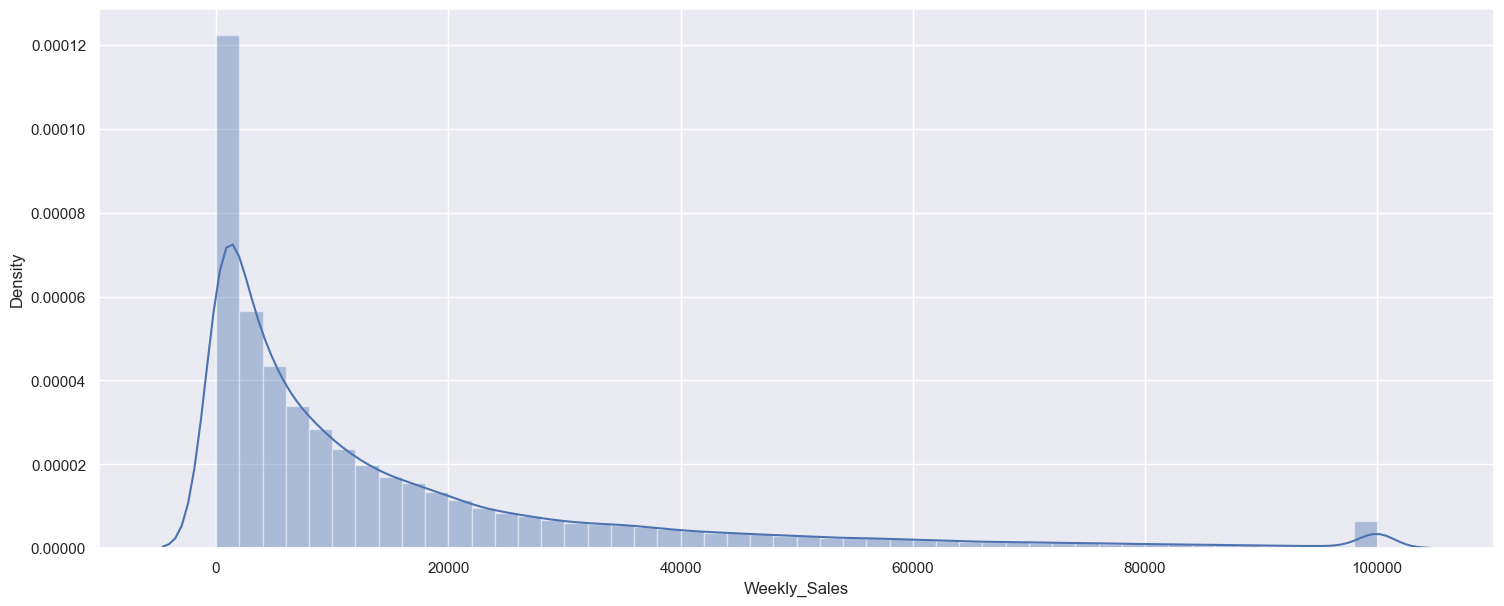

In [32]:
train_df["Weekly_Sales"] = np.where(train_df["Weekly_Sales"] > 100000, 100000, train_df["Weekly_Sales"])
sns.distplot(train_df.Weekly_Sales)

### Feature Extraction

In [33]:
train_df["Temperature"] = train_df["Temperature"].apply(lambda x: (x-32)*(5/9))
test_df["Temperature"] = test_df["Temperature"].apply(lambda x: (x-32)*(5/9))

In [34]:
train_df["Date"] = pd.to_datetime(train_df["Date"])
test_df["Date"] = pd.to_datetime(test_df["Date"])
train_df["Day"] = train_df["Date"].dt.day
train_df["Week"] = train_df["Date"].dt.weekday
train_df["Month"] = train_df["Date"].dt.month
train_df["Year"] = train_df["Date"].dt.year
test_df["Day"] = test_df["Date"].dt.day
test_df["Week"] = test_df["Date"].dt.weekday
test_df["Month"] = test_df["Date"].dt.month
test_df["Year"] = train_df["Date"].dt.year
s_1 = np.datetime64("2010-02-12")
s_2 = np.datetime64("2011-02-11")
s_3 = np.datetime64("2012-02-10")
s_4 = np.datetime64("2013-02-08")
l_1 = np.datetime64("2010-09-10")
l_2 = np.datetime64("2011-09-09")
l_3 = np.datetime64("2012-09-07")
l_4 = np.datetime64("2013-09-06")
t_1 = np.datetime64("2010-11-26")
t_2 = np.datetime64("2011-11-25")
t_3 = np.datetime64("2012-11-23")
t_4 = np.datetime64("2013-11-29")
c_1 = np.datetime64("2010-12-31")
c_2 = np.datetime64("2011-12-30")
c_3 = np.datetime64("2011-12-28")
c_4 = np.datetime64("2011-12-27")

In [35]:
train_df['Superbowl']=np.where(((train_df.Date==s_1) | (train_df.Date==s_2) | (train_df.Date==s_3) | (train_df.Date==s_4)),1,0)
train_df['labor']= np.where(((train_df.Date==l_1) | (train_df.Date==l_2) | (train_df.Date==l_3) | (train_df.Date==l_4)),1,0)
train_df['thanksgiving']=np.where(((train_df.Date==t_1) | (train_df.Date==t_2) | (train_df.Date==t_3) | (train_df.Date==t_4)),1,0)
train_df['christmas']=np.where(((train_df.Date==c_1) | (train_df.Date==c_2) | (train_df.Date==c_3) | (train_df.Date==c_4)),1,0)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,False,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0


In [36]:
test_df['Superbowl']=np.where(((test_df.Date==s_1) | (test_df.Date==s_2) | (test_df.Date==s_3) | (test_df.Date==s_4)),1,0)
test_df['labor']= np.where(((test_df.Date==l_1) | (test_df.Date==l_2) | (test_df.Date==l_3) | (test_df.Date==l_4)),1,0)
test_df['thanksgiving']=np.where(((test_df.Date==t_1) | (test_df.Date==t_2) | (test_df.Date==t_3) | (test_df.Date==t_4)),1,0)
test_df['christmas']=np.where(((test_df.Date==c_1) | (test_df.Date==c_2) | (test_df.Date==c_3) | (test_df.Date==c_4)),1,0)
test_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
1,1,2,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
2,1,3,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
3,1,4,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
4,1,5,2012-11-02,False,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0


In [37]:
train_df['IsHoliday']=np.where((train_df.IsHoliday==True),1,0)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2010-02-05,24924.50,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
1,1,2,2010-02-05,50605.27,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
2,1,3,2010-02-05,13740.12,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
3,1,4,2010-02-05,39954.04,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0
4,1,5,2010-02-05,32229.38,0,A,151315,5.727778,2.572,0.0,...,211.096358,8.106,5,4,2,2010,0,0,0,0


In [38]:
test_df['IsHoliday']=np.where((test_df.IsHoliday==True),1,0)
test_df.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Day,Week,Month,Year,Superbowl,labor,thanksgiving,christmas
0,1,1,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
1,1,2,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
2,1,3,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
3,1,4,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0
4,1,5,2012-11-02,0,A,151315,12.955556,3.386,6766.44,5147.7,...,223.462779,6.573,2,4,11,2010,0,0,0,0


In [39]:
train_df['IsHoliday'] = train_df['IsHoliday']|train_df['Superbowl']|train_df['labor']|train_df['thanksgiving']|train_df['christmas']
test_df['IsHoliday'] = test_df['IsHoliday']|test_df['Superbowl']|test_df['labor']|test_df['thanksgiving']|test_df['christmas']

In [40]:
dplist=['Superbowl', 'labor', 'thanksgiving', 'christmas']
train_df.drop(dplist,inplace=True,axis=1)
test_df.drop(dplist,inplace=True,axis=1)

In [41]:
train_df=pd.get_dummies(train_df, drop_first=True)
test_df=pd.get_dummies(test_df,drop_first=True)

c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

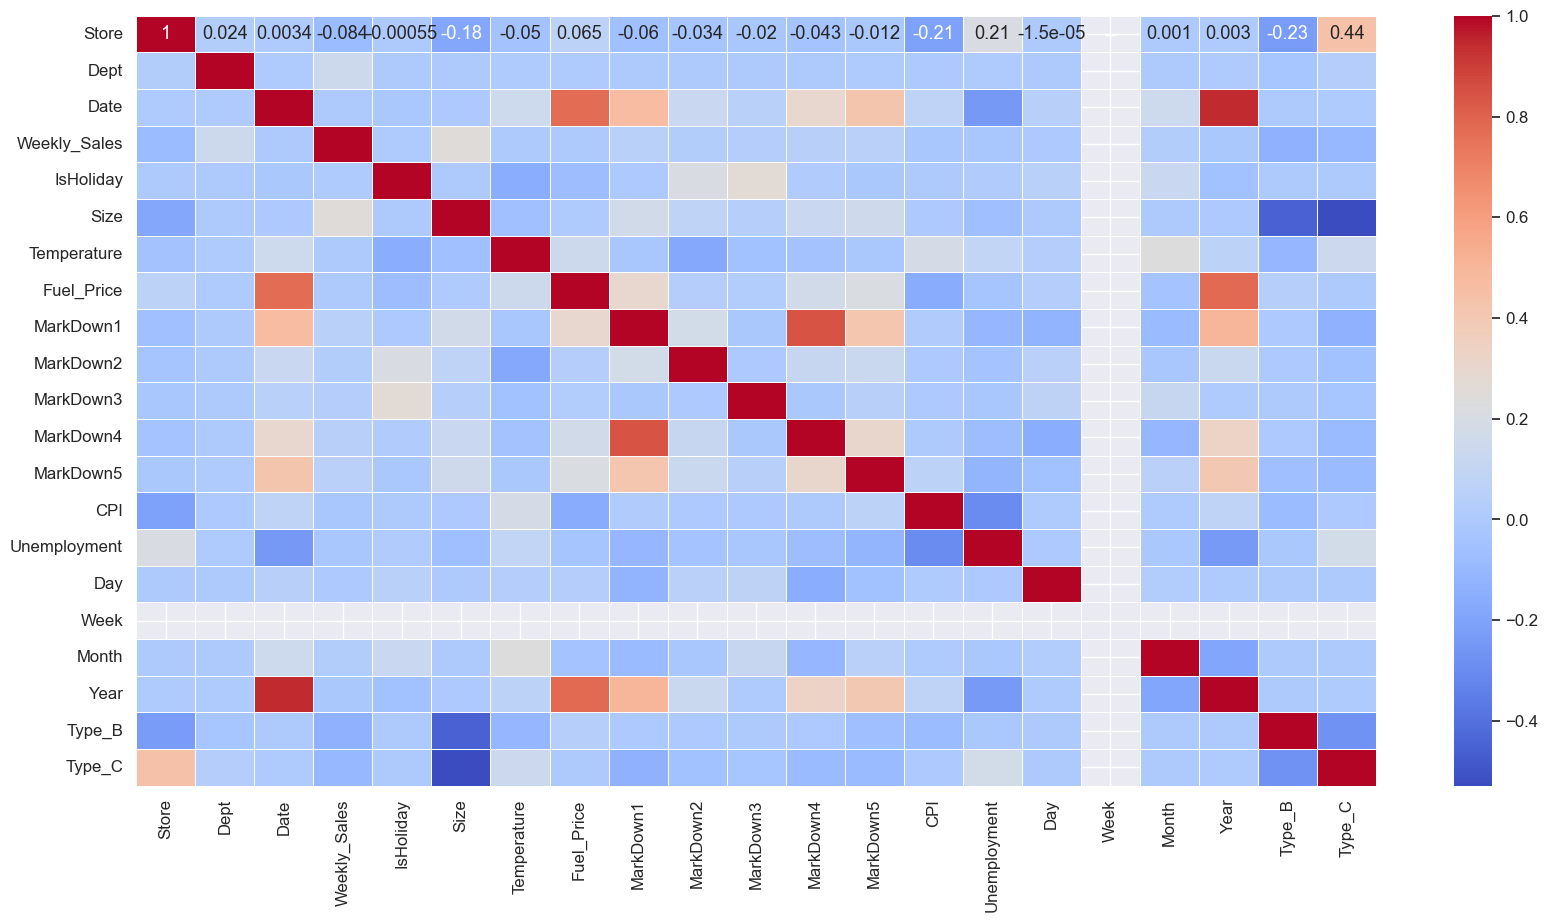

In [42]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(train_df.corr(),linewidths=0.5,annot=True, cmap="coolwarm")

c:\Users\saket\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

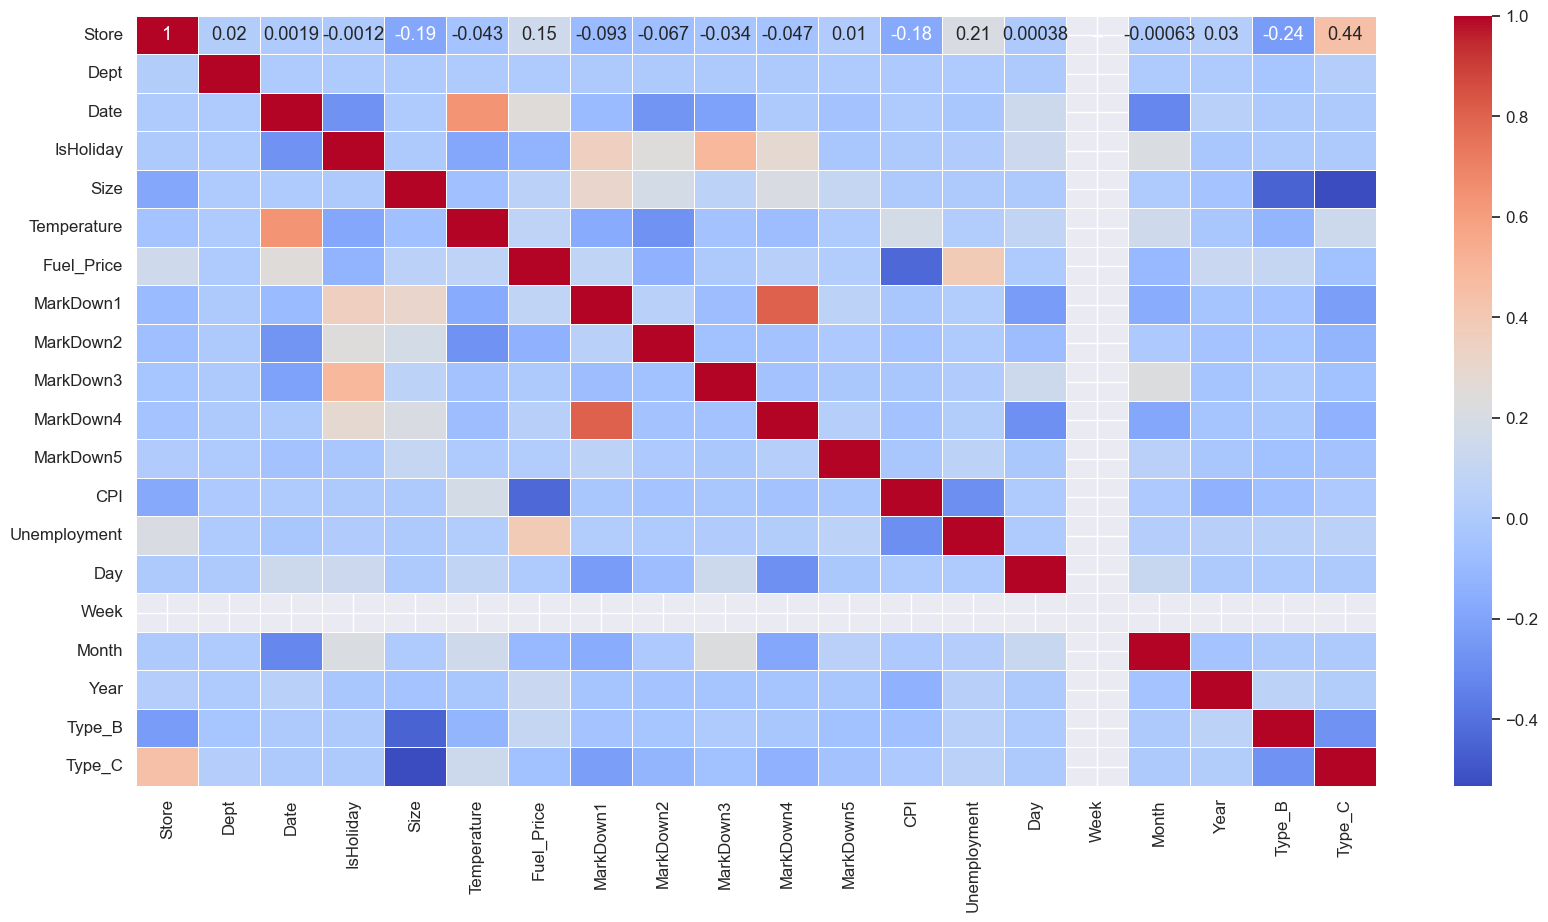

In [43]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(test_df.corr(),linewidths=0.5,annot=True, cmap="coolwarm")

In [44]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Week', 'Month',
       'Year', 'Type_B', 'Type_C'],
      dtype='object')

In [45]:
drop_cols = ["MarkDown1", "MarkDown5", "Year", "Day", "Month", "CPI", "Unemployment"]
train_df.drop(drop_cols, inplace=True, axis=1)
test_df.drop(drop_cols, inplace=True, axis=1)

In [46]:
for col in train_df:
    if train_df[col].dtypes == float:
        train_df[col] = train_df[col].astype("int")
for col in test_df:
    if test_df[col].dtypes == float:
        test_df[col] = test_df[col].astype("int")

In [47]:
X_train = train_df.drop(["Weekly_Sales", "Date"], axis=1)
y_train = train_df["Weekly_Sales"]
X_test = test_df.drop(["Date"], axis=1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(421570, 12) (421570,) (115064, 12)


In [48]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [49]:
y_pred = lr_model.predict(X_test)
lr_acc_score = round(lr_model.score(X_train, y_train) * 100, 2)
print(f"Accuracy score for this model: {lr_acc_score}%")

Accuracy score for this model: 9.0%


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=37, n_jobs=-1, verbose=5)
rf_model.fit(X_train, y_train)

building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


In [ ]:
y_pred_rf = rf_model.predict(X_test)
rf_acc_score = round(rf_model.score(X_train, y_train) * 100, 2)
print(f"Accuracy score of RandomForestRegressor is {rf_acc_score}%")

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  37 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  22 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  37 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  22 out of  37 | elapsed:    0.3s remaining:    0.2s


Accuracy score of RandomForestRegressor is 98.44%


[Parallel(n_jobs=16)]: Done  30 out of  37 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.5s finished


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc_score = round(dt_model.score(X_train, y_train) * 100, 2)
print(f"Accuracy score of DecisionTreeRegressor model is {dt_acc_score}%")

Accuracy score of DecisionTreeRegressor model is 98.86%


## Model comparison

In [ ]:
models = pd.DataFrame({"Model": ["LinearRegression", "RandomForestRegressor", "DecisionTreeRegressor"], 
                       "Accuracy": [lr_acc_score, rf_acc_score, dt_acc_score]})
models = models.sort_values("Accuracy", ascending=False).reset_index()

NameError: name 'pd' is not defined

In [ ]:
result = pd.DataFrame({
    "Store_Dept_Date": test_df.Store.astype("str") + "_" + test_df.Dept.astype("str") + "_" + test_df.Date.astype("str"),
    "Weekly_Sales_dt": y_pred_dt, "Weekly_Sales_rf": y_pred_rf
})
result.to_csv("Walmart_Sales_Forecasting.csv", index=False)

In [ ]:
result.head()

,Store_Dept_Date,Weekly_Sales_dt,Weekly_Sales_rf
0,1_1_2012-11-02,36988.0,21583.864865
1,1_2_2012-11-02,43997.0,46477.432432
2,1_3_2012-11-02,11535.0,12077.324324
3,1_4_2012-11-02,37802.0,38449.513514
4,1_5_2012-11-02,28307.0,26644.513514
